# Nettoyage des données Openfoodfact

## Import des librairies et du dataset

In [ ]:
## Import de librairies
!pip install missingno
!pip install tpot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import missingno as msno
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tpot import TPOTClassifier

C:\Users\33769\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
## Import du dataset

%cd "Chemin vers dossier data"

df_openfoodfacts = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

C:\Users\33769\OneDrive\Bureau\DataScientist\Projets\Projet_3\fr.openfoodfacts.org.products.csv


In [ ]:
df_openfoodfacts

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Valeurs nulles du dataset

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)

In [ ]:
df_off = df_openfoodfacts.copy()

In [ ]:
df_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [ ]:
df_off.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

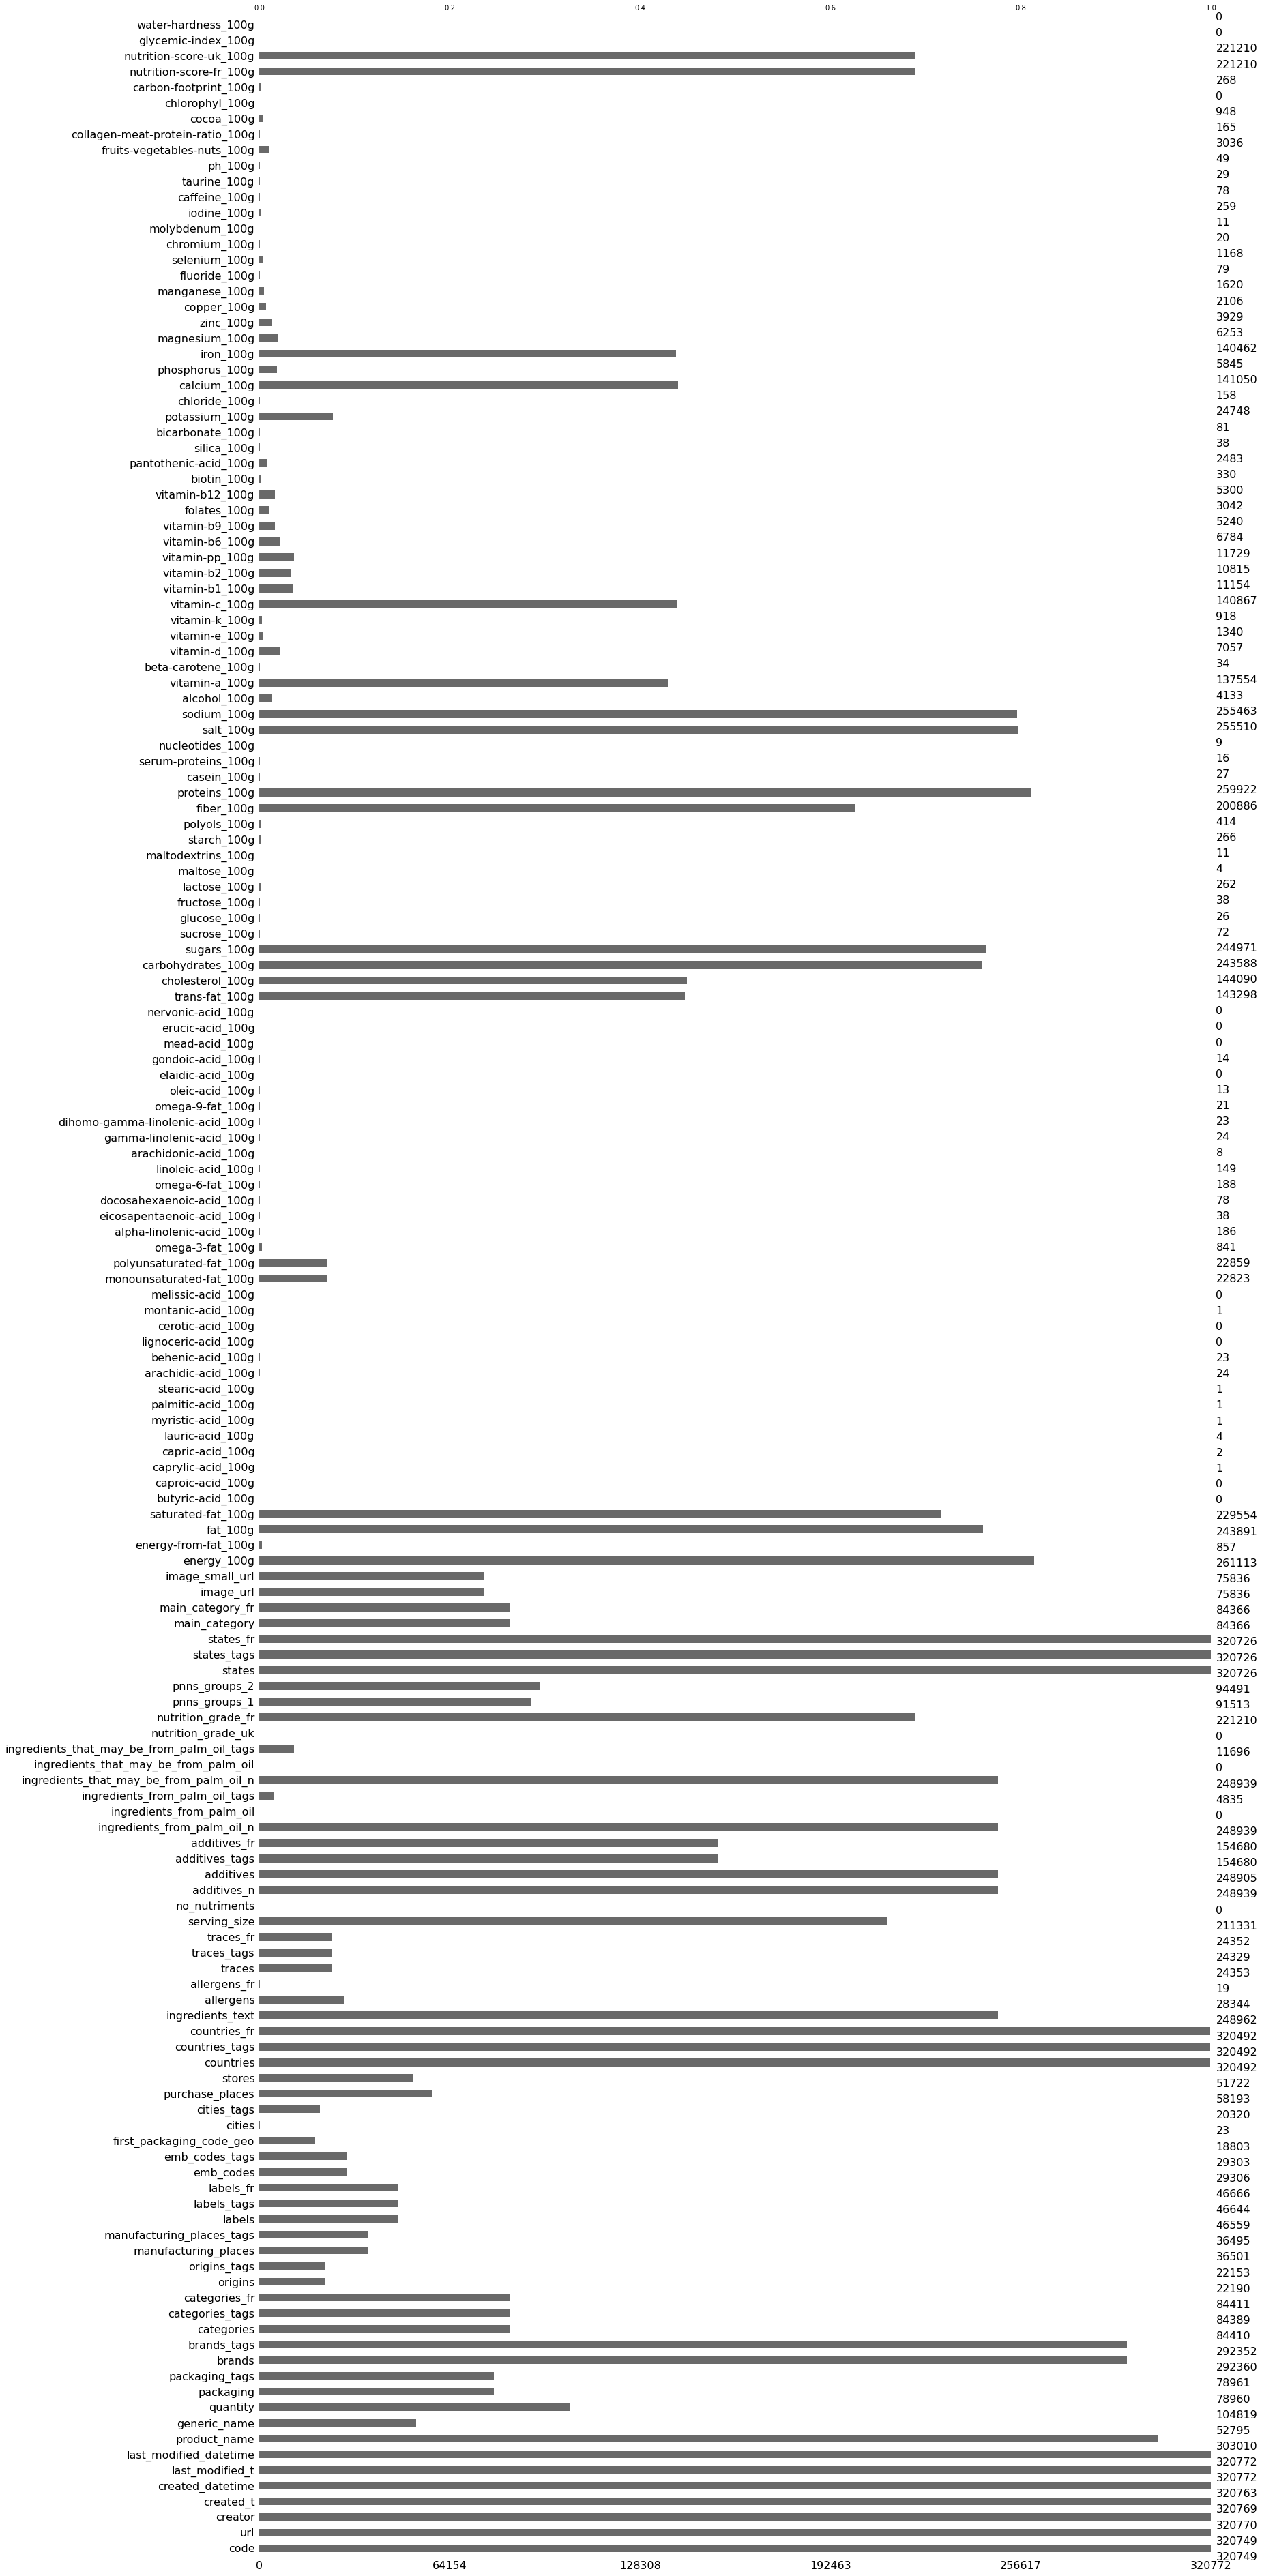

In [ ]:
msno.bar(df_off)

plt.savefig("bar_nan.jpg", format="jpg")

In [ ]:
df_off_describe = df_off.describe()
df_off_describe

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

### Traitement des valeurs nulles et doublons de la variable groupes pnns 1 et pnns 2

In [ ]:
df_off["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [ ]:
df_off["pnns_groups_1"].replace(['salty-snacks',
                                 'sugary-snacks',
                                 'cereals-and-potatoes',
                                'fruits-and-vegetables'],
                                ['Salty snacks',
                                 'Sugary snacks',
                                 'Cereals and potatoes',
                                'Fruits and vegetables'], inplace = True)

In [ ]:
#Les valeurs manquantes des variables pnns groupe 1 sont remplacées par la chaine de caractere "unknown"


df_off["pnns_groups_1"].fillna("unknown", inplace = True)

In [ ]:
df_off["pnns_groups_1"].value_counts()

unknown                    251883
Sugary snacks               12864
Beverages                    9033
Milk and dairy products      8825
Cereals and potatoes         8458
Fish Meat Eggs               8041
Fruits and vegetables        6895
Composite foods              6747
Fat and sauces               5216
Salty snacks                 2810
Name: pnns_groups_1, dtype: int64

In [ ]:
df_off["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

Les 5908 + 987 produits enregistrés dans la catégories fruits and vegetables, comparés aux 3036 produits dont le taux en fruits et noix a été enregistré permettent à eux seuls d'infirmer l'hypothese que les valeurs non incrémentées correspondes à des valeurs nulles

In [ ]:
#Les valeurs manquantes des variables pnns groupe 2 sont remplacées par la chaine de caractere "unknown"

df_off["pnns_groups_2"].fillna("unknown", inplace = True)

In [ ]:
df_off["pnns_groups_2"].unique()

array(['unknown', 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages',
       'Sweetened beverages', 'Dressings and sauces', 'One-dish meals',
       'vegetables', 'Soups', 'Chocolate products', 'Alcoholic beverages',
       'Fruits', 'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats',
       'Cheese', 'Appetizers', 'Nuts', 'Breakfast cereals',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Dairy desserts', 'Fruit nectars', 'pastries',
       'Tripe dishes', 'fruits', 'Salty and fatty products', 'cereals',
       'legumes', 'nuts'], dtype=object)

In [ ]:
df_off["pnns_groups_2"].replace(['Legumes',
                                 'vegetables',
                                 'legumes',
                                'cereals',
                                'fruits',
                                'nuts'],
                                ['Vegetables',
                                 'Vegetables',
                                 'Vegetables',
                                'Cereals',
                                'Fruits',
                                'Nuts'], inplace = True)

In [ ]:
df_off["pnns_groups_2"].value_counts()

unknown                             248905
One-dish meals                        5546
Vegetables                            4703
Sweets                                4698
Biscuits and cakes                    4561
Non-sugared beverages                 4302
Cereals                               4118
Cheese                                4024
Dressings and sauces                  3602
Milk and yogurt                       3297
Processed meat                        3247
Chocolate products                    3109
Alcoholic beverages                   2909
Fish and seafood                      2638
Sweetened beverages                   2170
Fruits                                2121
Appetizers                            2101
Fruit juices                          1924
Bread                                 1838
Meat                                  1694
Fats                                  1614
Breakfast cereals                     1408
Dairy desserts                         783
Ice cream  

### Conservation des seules colonnes avec un taux de remplissage superieur à 65%

In [ ]:
variables_tx_remplissage = (1-(df_off.isna().sum()/df_off.shape[0])).sort_values(ascending=False)
df_variables_tx_remplissage = pd.DataFrame(variables_tx_remplissage)
df_variables_tx_remplissage.to_excel("variables_taux_remplissage_fr.xlsx")
df_variables_tx_remplissage = df_variables_tx_remplissage[df_variables_tx_remplissage[0]>0.65]
colonnes_a_conserver = df_variables_tx_remplissage.index.tolist()
df_off_65 = df_off[colonnes_a_conserver]
df_off_65

,last_modified_t,last_modified_datetime,pnns_groups_2,pnns_groups_1,creator,created_t,created_datetime,code,url,states_fr,states_tags,states,countries,countries_fr,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size
0,1474103893,2016-09-17T09:18:13Z,unknown,unknown,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:FR,France,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1489069957,2017-03-09T14:32:37Z,unknown,unknown,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d,14.0,14.0,28 g (1 ONZ)
2,1489069957,2017-03-09T14:32:37Z,unknown,unknown,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b,0.0,0.0,28 g (0.25 cup)
3,1489055731,2017-03-09T10:35:31Z,unknown,unknown,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d,12.0,12.0,28 g (0.25 cup)
4,1489055653,2017-03-09T10:34:13Z,unknown,unknown,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN,NaN,NaN,35 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,1491244498,2017-04-03T18:34:58Z,unknown,unknown,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:RO,Roumanie,en:romania,Tomato & ricotta,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,1491244499,2017-04-03T18:34:59Z,unknown,unknown,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,99567453,http://world-fr.openfoodfacts.org/produit/9

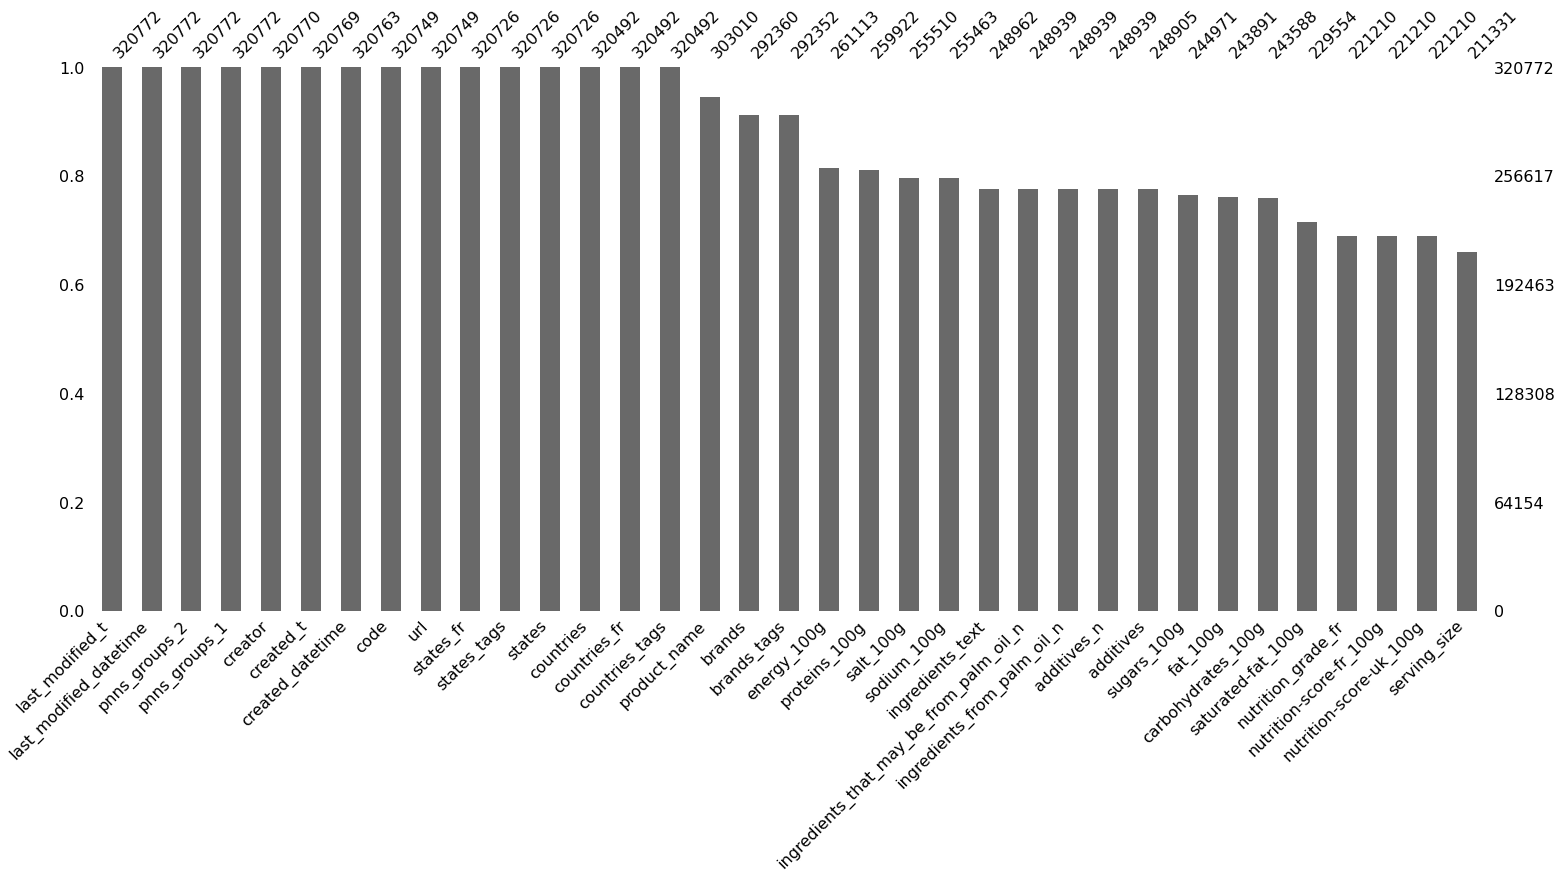

In [ ]:
msno.bar(df_off_65)
plt.savefig("bar_nan_2.jpg", format="jpg")

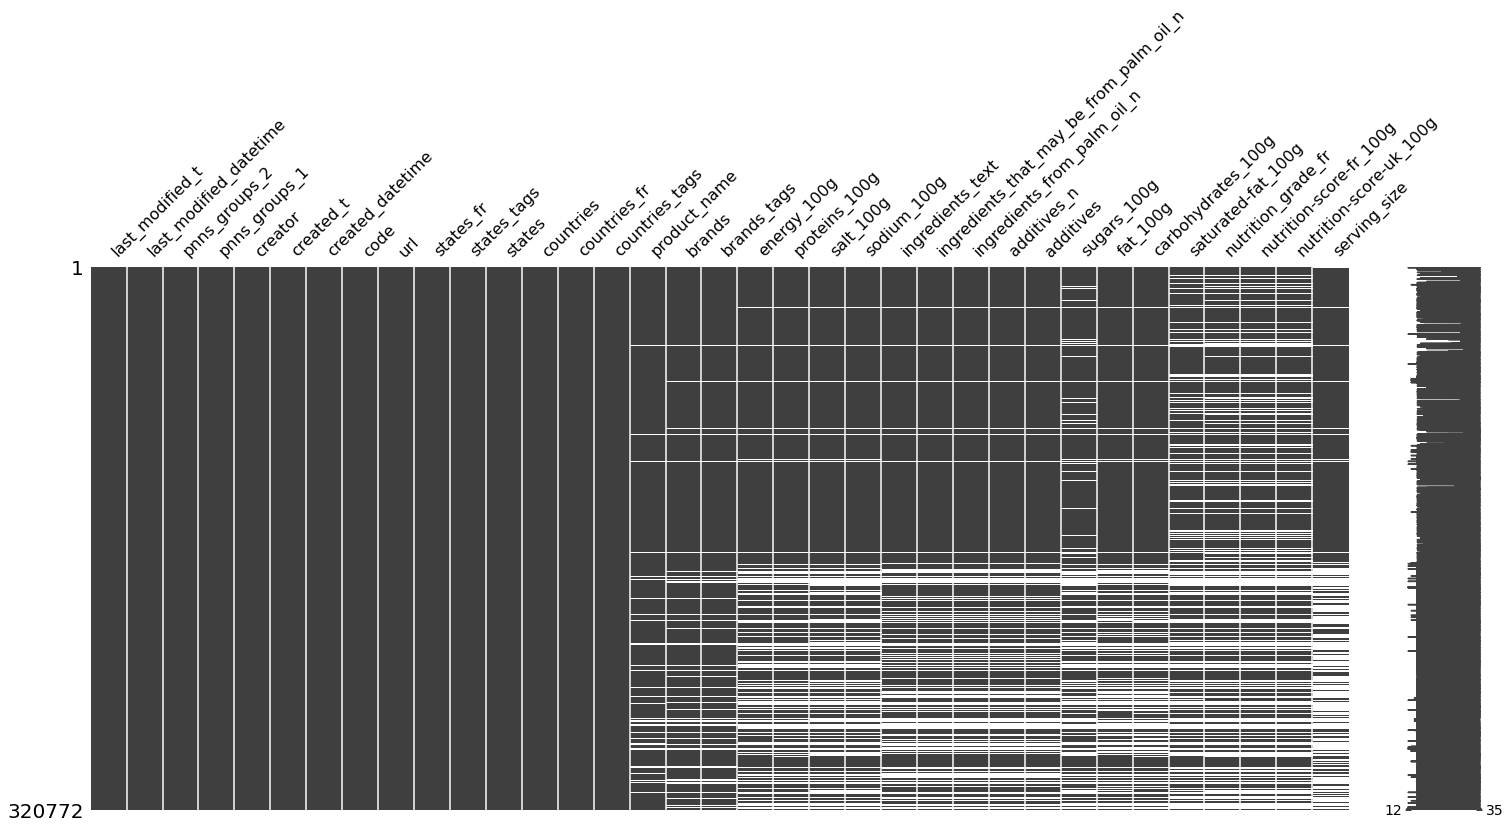

In [ ]:
msno.matrix(df_off_65)

plt.savefig("matrix_nan.jpg", format="jpg")

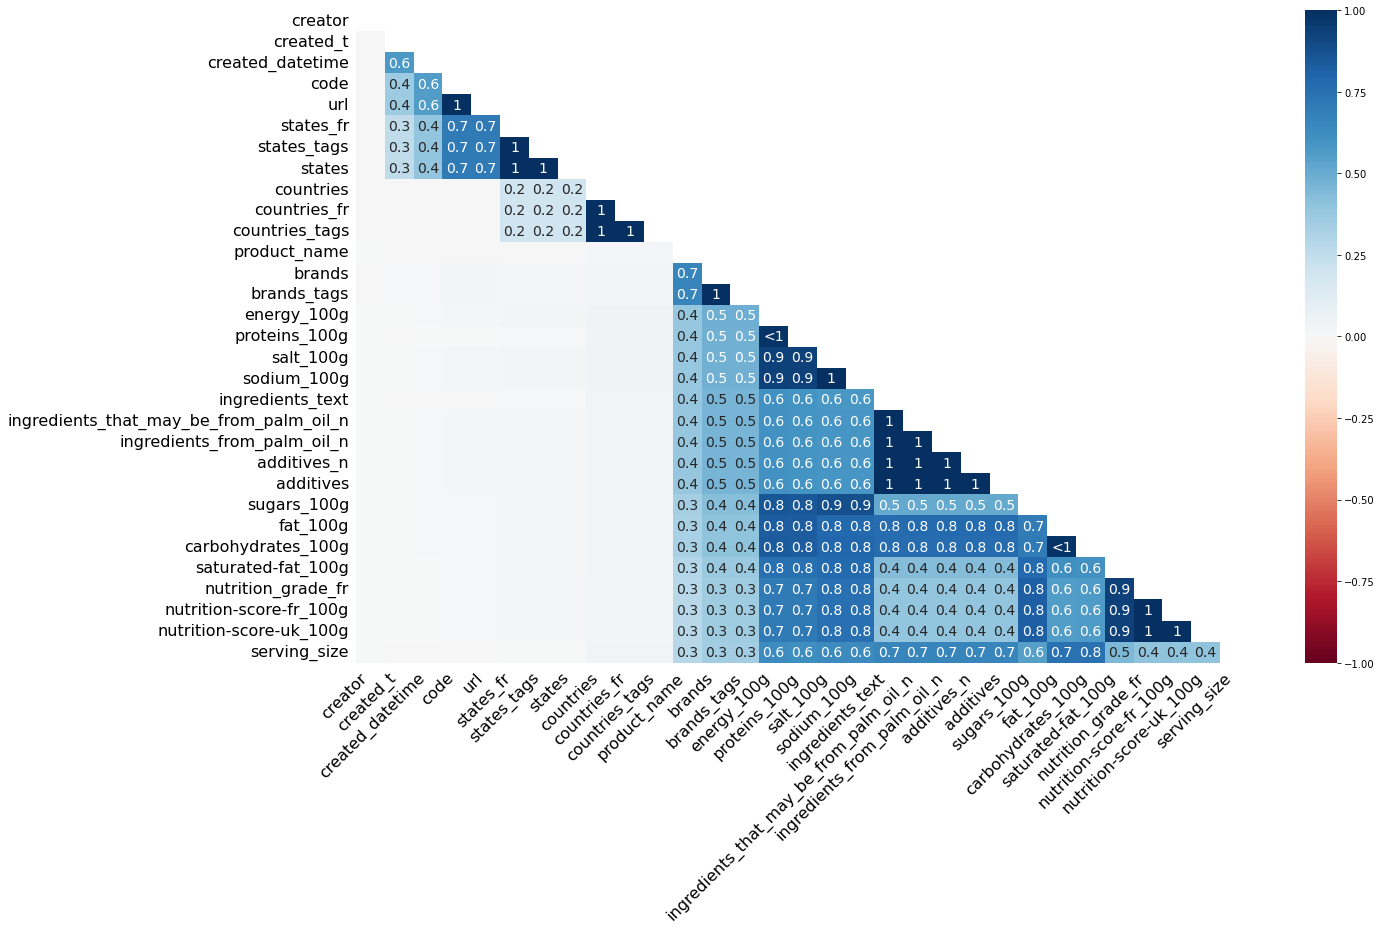

In [ ]:
msno.heatmap(df_off_65)
plt.savefig("heatmap_nan.jpg", format="jpg")

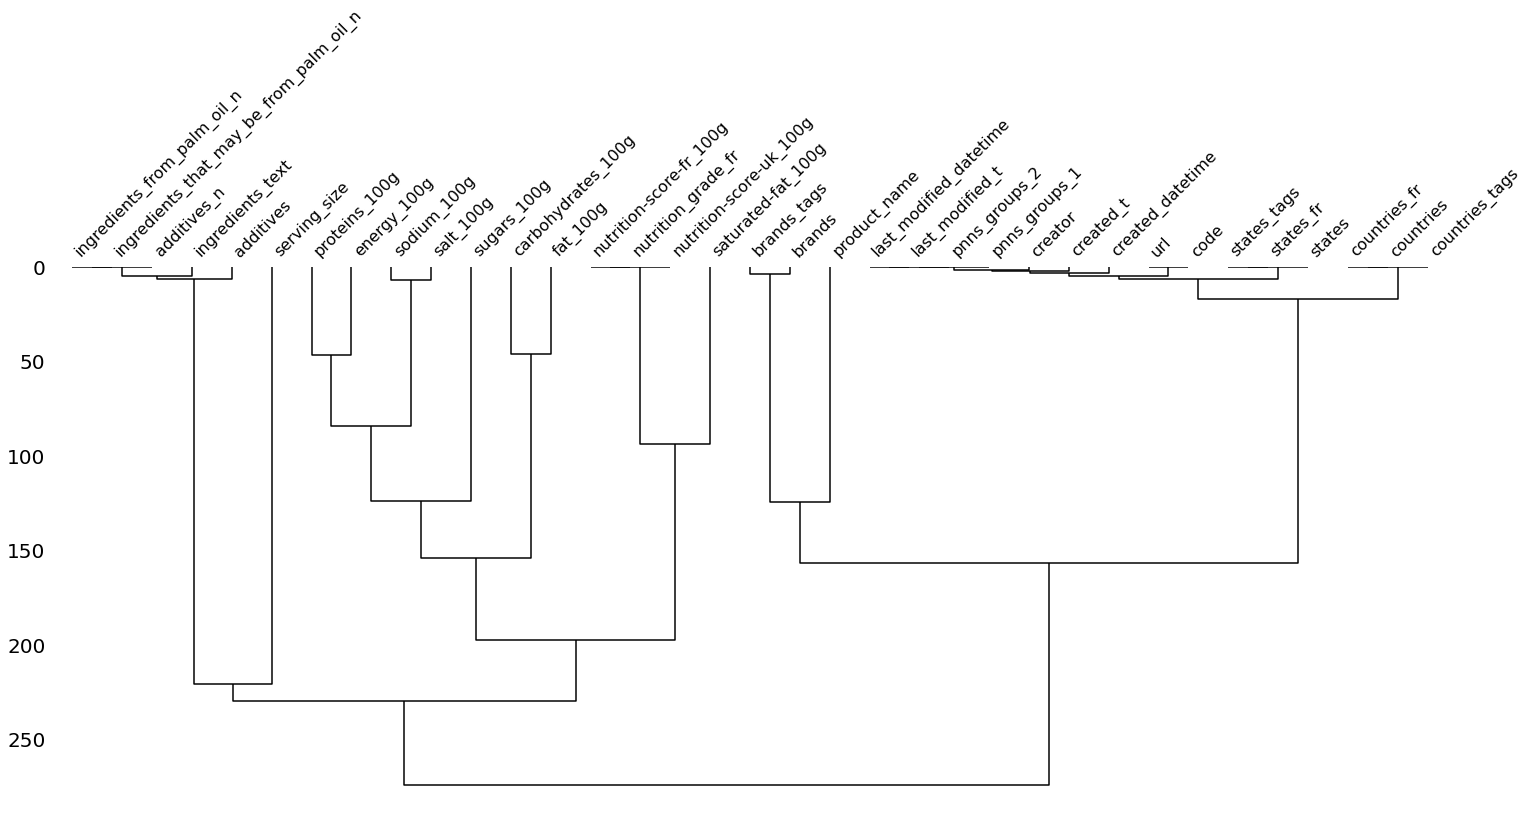

In [ ]:
msno.dendrogram(df_off_65)
plt.savefig("dendrogramme_nan.jpg", format="jpg")

In [ ]:
df_off_65["brands"].nunique()

58784

In [ ]:
df_off_65["brands"].value_counts()

Carrefour       2978
Auchan          2340
U               2050
Meijer          1995
Leader Price    1700
                ... 
Tanka Bites        1
Tanka Trail        1
Tram Bar Llc       1
Betsy Ann          1
乐吧                 1
Name: brands, Length: 58784, dtype: int64

### Suppression des variables temporelles

In [ ]:
df_off_65.drop(columns=['created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime'], inplace = True)

C:\Users\33769\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_off_65.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size'],
      dtype='object')

In [ ]:
df_off_65.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.611130e+05,259922.000000,255510.000000,255463.000000,248939.000000,248939.000000,248939.000000,244971.000000,243891.000000,243588.000000,229554.000000,221210.000000,221210.000000
mean,1.141915e+03,7.075940,2.028624,0.798815,0.055246,0.019659,1.936024,16.003484,12.730379,32.073981,5.129932,9.165535,9.058049
std,6.447154e+03,8.409054,128.269454,50.504428,0.269207,0.140524,2.502019,22.327284,17.578747,29.731719,8.014238,9.055903,9.183589
min,0.000000e+00,-800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,3.770000e+02,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,1.300000,0.000000,6.000000,0.000000,1.000000,1.000000
50%,1.100000e+03,4.760000,0.581660,0.229000,0.000000,0.000000,1.000000,5.710000,5.000000,20.600000,1.790000,10.000000,9.000000
75%,1.674000e+03,10.000000,1.374140,0.541000,0.000000,0.000000,3.000000,24.000000,20.000000,58.330000,7.140000,16.000000,16.000000
max,3.251373e+06,430.000000,64312.800000,25320.000000,6.000000,2.000000,31.000000,3520.000000,714.290000,2916.670000,550.000000,40.000000,40.000000


In [ ]:
df_off_65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   pnns_groups_2                            320772 non-null  object 
 1   pnns_groups_1                            320772 non-null  object 
 2   creator                                  320770 non-null  object 
 3   code                                     320749 non-null  object 
 4   url                                      320749 non-null  object 
 5   states_fr                                320726 non-null  object 
 6   states_tags                              320726 non-null  object 
 7   states                                   320726 non-null  object 
 8   countries                                320492 non-null  object 
 9   countries_fr                             320492 non-null  object 
 10  countries_tags                  

In [ ]:
# changement de signe des valeurs négatives  dans les colonnes du grammage d'élément par 100 g

df_off_65.loc[df_off_65["proteins_100g"]<0, ["proteins_100g"]] = -df_off_65["proteins_100g"]
df_off_65.loc[df_off_65["sugars_100g"]<0, ["sugars_100g"]] = -df_off_65["sugars_100g"]
df_off_65.loc[df_off_65["nutrition-score-fr_100g"]<0, ["nutrition-score-fr_100g"]] = -df_off_65["nutrition-score-fr_100g"]
df_off_65.loc[df_off_65["nutrition-score-uk_100g"]<0, ["nutrition-score-uk_100g"]] = -df_off_65["nutrition-score-uk_100g"]

df_off_65.describe()

C:\Users\33769\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.611130e+05,259922.000000,255510.000000,255463.000000,248939.000000,248939.000000,248939.000000,244971.000000,243891.000000,243588.000000,229554.000000,221210.000000,221210.000000
mean,1.141915e+03,7.085970,2.028624,0.798815,0.055246,0.019659,1.936024,16.003781,12.730379,32.073981,5.129932,10.268442,10.210528
std,6.447154e+03,8.400604,128.269454,50.504428,0.269207,0.140524,2.502019,22.327071,17.578747,29.731719,8.014238,7.783021,7.882358
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.770000e+02,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,1.300000,0.000000,6.000000,0.000000,3.000000,3.000000
50%,1.100000e+03,4.760000,0.581660,0.229000,0.000000,0.000000,1.000000,5.710000,5.000000,20.600000,1.790000,10.000000,9.000000
75%,1.674000e+03,10.000000,1.374140,0.541000,0.000000,0.000000,3.000000,24.000000,20.000000,58.330000,7.140000,16.000000,16.000000
max,3.251373e+06,800.000000,64312.800000,25320.000000,6.000000,2.000000,31.000000,3520.000000,714.290000,2916.670000,550.000000,40.000000,40.000000


In [ ]:
# suppression des valeurs superieures à 100 dans les colonnes du grammage d'élément par 100 g


index_names = df_off_65[ df_off_65["proteins_100g"]>100 ].index
df_off_65.drop(index_names, inplace = True)
index_names2 = df_off_65[ df_off_65["salt_100g"]>100 ].index
df_off_65.drop(index_names2, inplace = True)
index_names3 = df_off_65[ df_off_65["sodium_100g"]>100 ].index 
df_off_65.drop(index_names3, inplace = True)
index_names4 = df_off_65[ df_off_65["sugars_100g"]>100 ].index 
df_off_65.drop(index_names4, inplace = True)
index_names5 = df_off_65[ df_off_65["fat_100g"]>100 ].index 
df_off_65.drop(index_names5, inplace = True)
index_names6 = df_off_65[ df_off_65["carbohydrates_100g"]>100 ].index 
df_off_65.drop(index_names6, inplace = True)
index_names7 = df_off_65[ df_off_65["saturated-fat_100g"]>100 ].index 
df_off_65.drop(index_names7, inplace = True)


df_off_65

C:\Users\33769\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,pnns_groups_2,pnns_groups_1,creator,code,url,states_fr,states_tags,states,countries,countries_fr,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size
0,unknown,unknown,openfoodfacts-contributors,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:FR,France,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,unknown,usda-ndb-import,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d,14.0,14.0,28 g (1 ONZ)
2,unknown,unknown,usda-ndb-import,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b,0.0,0.0,28 g (0.25 cup)
3,unknown,unknown,usda-ndb-import,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d,12.0,12.0,28 g (0.25 cup)
4,unknown,unknown,usda-ndb-import,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN,NaN,NaN,35 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,unknown,unknown,openfoodfacts-contributors,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:RO,Roumanie,en:romania,Tomato & ricotta,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,unknown,unknown,usda-ndb-import,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,0.0,0.00,0.00000,0.000,"Organic peppermint, organic lemon grass, organ...",0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.00,0.00,0.00,0.00,b,0.0,0.0,20 g (0.7 oz)
320769,Appetizers,Salty snacks,tomato,9970229501521,http://world-fr.openfoodfa

In [ ]:
df_off_65.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.609340e+05,259751.000000,255332.000000,255285.000000,248767.000000,248767.000000,248767.000000,244888.000000,243716.000000,243411.000000,229478.000000,221142.000000,221142.000000
mean,1.140956e+03,7.082723,1.588440,0.625484,0.055277,0.019665,1.936861,15.984931,12.731987,32.068745,5.126149,10.266770,10.208798
std,6.429886e+03,8.157225,6.242557,2.457903,0.269283,0.140544,2.502155,21.164549,17.506307,29.139185,7.911611,7.782327,7.881663
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.770000e+02,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,1.300000,0.000000,6.000000,0.000000,3.000000,3.000000
50%,1.100000e+03,4.760000,0.580000,0.228346,0.000000,0.000000,1.000000,5.710000,5.000000,20.690000,1.790000,10.000000,9.000000
75%,1.674000e+03,10.000000,1.371600,0.540000,0.000000,0.000000,3.000000,24.000000,20.000000,58.330000,7.140000,16.000000,16.000000
max,3.251373e+06,100.000000,100.000000,39.370079,6.000000,2.000000,31.000000,100.000000,100.000000,100.000000,100.000000,40.000000,40.000000


In [ ]:
df_off_65

,pnns_groups_2,pnns_groups_1,creator,code,url,states_fr,states_tags,states,countries,countries_fr,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size
0,unknown,unknown,openfoodfacts-contributors,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:FR,France,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,unknown,usda-ndb-import,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d,14.0,14.0,28 g (1 ONZ)
2,unknown,unknown,usda-ndb-import,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b,0.0,0.0,28 g (0.25 cup)
3,unknown,unknown,usda-ndb-import,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d,12.0,12.0,28 g (0.25 cup)
4,unknown,unknown,usda-ndb-import,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN,NaN,NaN,35 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,unknown,unknown,openfoodfacts-contributors,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:RO,Roumanie,en:romania,Tomato & ricotta,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,unknown,unknown,usda-ndb-import,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,0.0,0.00,0.00000,0.000,"Organic peppermint, organic lemon grass, organ...",0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.00,0.00,0.00,0.00,b,0.0,0.0,20 g (0.7 oz)
320769,Appetizers,Salty snacks,tomato,9970229501521,http://world-fr.openfoodfa

In [ ]:
df_off_65.shape

(320589, 31)

**Il reste 320589 observations sur les 320772 du dataset original**

In [ ]:
df_off_65.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size'],
      dtype='object')

### Variable Additifs

In [ ]:
# df_off_65['additives_n'].unique()

In [ ]:
# plt.title("Distribution des aliments par nombre d'additifs")
# # sns.displot(df_off_65['additives_n'])
# plt.hist(df_off_65['additives_n'])

In [ ]:
# df_off_65["additives"].unique()

### Variable Ingrédients provenant d'huile de palme

In [ ]:
# plt.title("Distribution des aliments par nombre d'ingrédients provenant d'huile de palme")
# # sns.displot(df_off_65['ingredients_that_may_be_from_palm_oil_n'])
# plt.hist(df_off_65['ingredients_that_may_be_from_palm_oil_n'])

## Modele d' incrementation nutriscore

### Essai par regression logistique multinomiale

In [ ]:
df_off_65_2 = df_off_65.copy()

index_names = df_off_65[ df_off_65["proteins_100g"].isna() ].index
df_off_65.drop(index_names, inplace = True)
index_names2 = df_off_65[ df_off_65["salt_100g"].isna() ].index
df_off_65.drop(index_names2, inplace = True)
index_names3 = df_off_65[ df_off_65["sodium_100g"].isna() ].index 
df_off_65.drop(index_names3, inplace = True)
index_names4 = df_off_65[ df_off_65["sugars_100g"].isna() ].index 
df_off_65.drop(index_names4, inplace = True)
index_names5 = df_off_65[ df_off_65["fat_100g"].isna() ].index 
df_off_65.drop(index_names5, inplace = True)
index_names6 = df_off_65[ df_off_65["carbohydrates_100g"].isna() ].index 
df_off_65.drop(index_names6, inplace = True)
index_names7 = df_off_65[ df_off_65["saturated-fat_100g"].isna() ].index 
df_off_65.drop(index_names7, inplace = True)

C:\Users\33769\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_off_65.shape

(203942, 32)

**Dans ce dataset pour incrementation par machine learning il reste 203942 observations sur les 320572 originales**

In [ ]:
# creation d'un dataframe de toutes les valeurs nutritives et de nutriscore grade incrémenté
df_off_reglog = df_off_65.copy()

# df_off_reglog = df_off_reglog [~df_off_reglog ["proteins_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["salt_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["sodium_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["sugars_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["fat_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["carbohydrates_100g"].isna()]
# df_off_reglog = df_off_reglog[~df_off_reglog["saturated-fat_100g"].isna()]
df_off_reglog = df_off_reglog[~df_off_reglog["nutrition_grade_fr"].isna()]
# df_off_reglog

In [ ]:
df_off_reglog["nutrition_grade_fr"].unique()

array(['d', 'b', 'c', 'a', 'e'], dtype=object)

In [ ]:
## preparation du modele

df_off_reglog_params = df_off_reglog[["proteins_100g",
                        "salt_100g",
                        "sodium_100g",
                        "sugars_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "saturated-fat_100g",
                        "nutrition_grade_fr"]]




X = df_off_reglog_params[["proteins_100g",
                        "salt_100g",
                        "sodium_100g",
                        "sugars_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "saturated-fat_100g"]]
y = df_off_reglog_params["nutrition_grade_fr"]


X = X.values
scaler = StandardScaler()
scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#instanciation du modèle
modele_regLog = LogisticRegression(random_state = 0,
                                   solver = 'newton-cg',
                                   multi_class = 'multinomial')

#training
modele_regLog.fit(X_train,y_train)

#précision du modèle
precision_train = modele_regLog.score(X_train,y_train)
precision_test = modele_regLog.score(X_test,y_test)

list_probability = pd.DataFrame(modele_regLog.predict_proba(X_test))

y_predict = modele_regLog.predict(X_test)

print( "test score : "+ str( precision_test*100))

test score : 61.95368959244875


 La précision n'étant pas suffisante nous ne conserverons pas cette methode

### Recherche d'un modele d' incrementation nutriscore par Classification (tpot)

In [ ]:
# tpot = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2, n_jobs = -1)
# tpot.fit(X,y)

Un algorithme Tpot a été lancé pour recherche du meilleur algorithme de classification:

tpot = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2, n_jobs = -1)
tpot.fit(X,y)

L'algorithme de Randomforestclassifier obtient 85% avec ces hyperparametres :

RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=7, n_estimators=100)

### Imputation des nutriscores par RandomForestClassifier avec indicateur d'imputation

In [ ]:
#instanciation du modèle

modele_rtc = RandomForestClassifier(bootstrap=False,
                                    criterion="entropy",
                                    max_features=0.35000000000000003,
                                    min_samples_leaf=5,
                                    min_samples_split=7,
                                    n_estimators=100)

#training
modele_rtc.fit(X_train,y_train)

#précision du modèle
precision_train = modele_rtc.score(X_train,y_train)
precision_test = modele_rtc.score(X_test,y_test)
print("train score : " + str(precision_train*100) + "\n"  + "test score : "+ str( precision_test*100))


train score : 95.9717562036798
test score : 88.06351703456073


In [ ]:
confusion_matrix(y_test, modele_rtc.predict(X_test)).ravel()

array([ 5899,   578,   121,     3,    11,   520,  5030,   592,    37,
          29,    86,   436,  7173,   681,    24,     9,    41,   565,
       10472,   417,    24,    64,    57,   561,  7252], dtype=int64)

In [ ]:
# Visualisation de la matrice de confusion

confusion_matrix(y_test, modele_rtc.predict(X_test))

array([[ 5899,   578,   121,     3,    11],
       [  520,  5030,   592,    37,    29],
       [   86,   436,  7173,   681,    24],
       [    9,    41,   565, 10472,   417],
       [   24,    64,    57,   561,  7252]], dtype=int64)

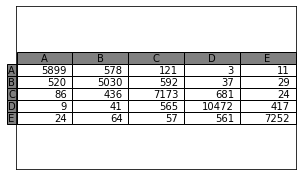

In [ ]:
plt.figure(linewidth = 2,figsize=(5,3))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.table(cellText = confusion_matrix(y_test, modele_rtc.predict(X_test)),
         loc = 'center', colLabels = ['A','B','C','D','E'],
          rowLabels = ['A','B','C','D','E'],
          rowLoc = 'left',
         colColours = ['grey','grey','grey','grey','grey'],
         rowColours = ['grey','grey','grey','grey','grey'])

plt.savefig("matrice_resultats.jpg", format="jpg")

In [ ]:
df_off_65["nutrition_grade_fr"].unique()

array(['d', 'b', 'c', 'a', 'e', nan], dtype=object)

In [ ]:
df_off_65["nutscore_original_imputed"] =  df_off_65["nutrition_grade_fr"].map({'a': "original",
                                                                                   'b': "original",
                                                                                   'c': "original",
                                                                                   'd': "original",
                                                                                   'e': "original"})
df_off_65["nutscore_original_imputed"].fillna("imputed",inplace = True)

C:\Users\33769\AppData\Local\Temp/ipykernel_23016/355343527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_off_65["nutscore_original_imputed"] =  df_off_65["nutrition_grade_fr"].map({'a': "original",
C:\Users\33769\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_off_65.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size', 'nutscore_original_imputed'],
      dtype='object')

In [ ]:
df_off_65_2.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size'],
      dtype='object')

In [ ]:
df_off_65_nutscore_predict = df_off_65[df_off_65["nutrition_grade_fr"].isna()]

y_predict = modele_rtc.predict(df_off_65_nutscore_predict[["proteins_100g",
                        "salt_100g",
                        "sodium_100g",
                        "sugars_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "saturated-fat_100g"]])


df_off_65_nutscore_predict["nutrition_grade"] = y_predict

df_off_65_nutscore_predict = pd.merge(df_off_65_2,
                                      df_off_65_nutscore_predict["nutrition_grade"],
                                      how = "left",
                                      left_index=True,
                                      right_index=True)


df_off_65_nutscore_predict.loc[df_off_65_nutscore_predict["nutrition_grade_fr"].isna(),"nutrition_grade_fr"] = df_off_65_nutscore_predict["nutrition_grade"]
del df_off_65_nutscore_predict["nutrition_grade"]
df_off_65_nutscore_predict.info()


C:\Users\33769\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\33769\AppData\Local\Temp/ipykernel_23016/3335245099.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_off_65_nutscore_predict["nutrition_grade"] = y_predict


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320589 entries, 0 to 320771
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   pnns_groups_2                            320589 non-null  object 
 1   pnns_groups_1                            320589 non-null  object 
 2   creator                                  320587 non-null  object 
 3   code                                     320566 non-null  object 
 4   url                                      320566 non-null  object 
 5   states_fr                                320543 non-null  object 
 6   states_tags                              320543 non-null  object 
 7   states                                   320543 non-null  object 
 8   countries                                320309 non-null  object 
 9   countries_fr                             320309 non-null  object 
 10  countries_tags                  

In [ ]:
df_off_65_nutscore_predict

,pnns_groups_2,pnns_groups_1,creator,code,url,states_fr,states_tags,states,countries,countries_fr,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size
0,unknown,unknown,openfoodfacts-contributors,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:FR,France,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,unknown,usda-ndb-import,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d,14.0,14.0,28 g (1 ONZ)
2,unknown,unknown,usda-ndb-import,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b,0.0,0.0,28 g (0.25 cup)
3,unknown,unknown,usda-ndb-import,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d,12.0,12.0,28 g (0.25 cup)
4,unknown,unknown,usda-ndb-import,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN,NaN,NaN,35 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,unknown,unknown,openfoodfacts-contributors,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:RO,Roumanie,en:romania,Tomato & ricotta,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,unknown,unknown,usda-ndb-import,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,0.0,0.00,0.00000,0.000,"Organic peppermint, organic lemon grass, organ...",0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.00,0.00,0.00,0.00,b,0.0,0.0,20 g (0.7 oz)
320769,Appetizers,Salty snacks,tomato,9970229501521,http://world-fr.openfoodfa

## Valeurs manquantes lipides, protides, glucides et sel

In [ ]:
df_off_65_2

,pnns_groups_2,pnns_groups_1,creator,code,url,states_fr,states_tags,states,countries,countries_fr,countries_tags,product_name,brands,brands_tags,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_size
0,unknown,unknown,openfoodfacts-contributors,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:FR,France,en:france,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,unknown,usda-ndb-import,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d,14.0,14.0,28 g (1 ONZ)
2,unknown,unknown,usda-ndb-import,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Peanuts,Torn & Glasser,torn-glasser,1941.0,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b,0.0,0.0,28 g (0.25 cup)
3,unknown,unknown,usda-ndb-import,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Salted Nut Mix,Grizzlies,grizzlies,2540.0,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d,12.0,12.0,28 g (0.25 cup)
4,unknown,unknown,usda-ndb-import,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,Organic Polenta,Bob's Red Mill,bob-s-red-mill,1552.0,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN,NaN,NaN,35 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,unknown,unknown,openfoodfacts-contributors,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:RO,Roumanie,en:romania,Tomato & ricotta,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,unknown,unknown,usda-ndb-import,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",US,États-Unis,en:united-states,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,0.0,0.00,0.00000,0.000,"Organic peppermint, organic lemon grass, organ...",0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.00,0.00,0.00,0.00,b,0.0,0.0,20 g (0.7 oz)
320769,Appetizers,Salty snacks,tomato,9970229501521,http://world-fr.openfoodfa

In [ ]:
df_off_65_2.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size'],
      dtype='object')

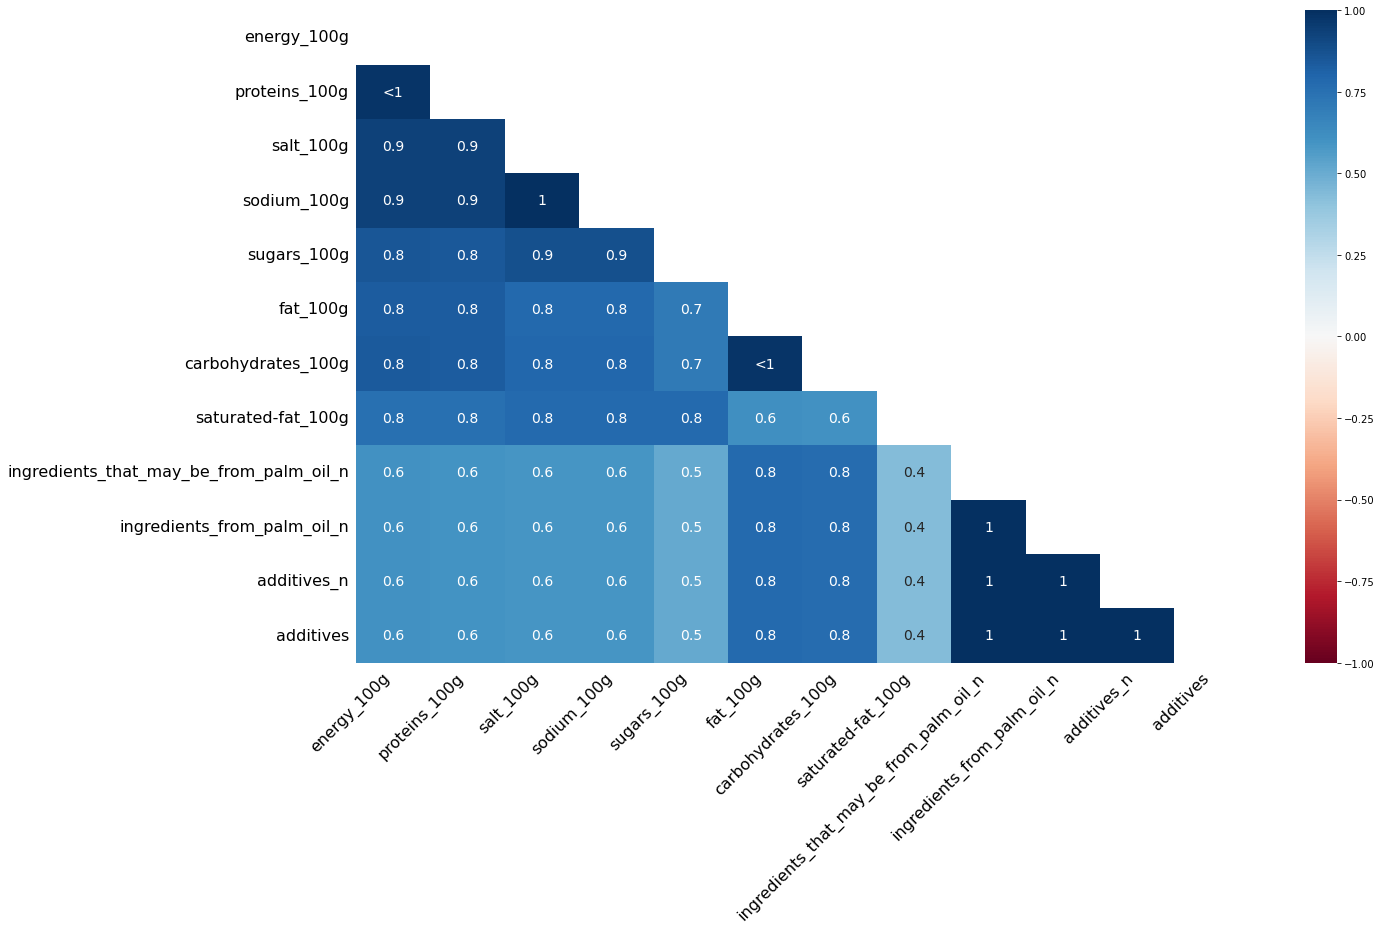

In [ ]:
msno.heatmap(df_off_65_2[['energy_100g',
                          'proteins_100g',
                          'salt_100g',
                          'sodium_100g',
                          'sugars_100g',
                          'fat_100g',
                          'carbohydrates_100g',
                          'saturated-fat_100g',
                          'ingredients_that_may_be_from_palm_oil_n',
                          'ingredients_from_palm_oil_n',
                          'additives_n',
                          'additives']])

plt.savefig("heatmap_nan_2.jpg", format="jpg")

Les valeurs nulles etant non renseignées de façon corrélées (entre 40 % et 90% variables 2 à 2 selon les produits, une imputation par une valeur moyenne ou médiane n'est pas adaptée il est donc décidé de les garder non renseignées.

In [ ]:
df_off_65_2.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'creator', 'code', 'url', 'states_fr',
       'states_tags', 'states', 'countries', 'countries_fr', 'countries_tags',
       'product_name', 'brands', 'brands_tags', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'serving_size'],
      dtype='object')

In [ ]:
df_off_final = df_off_65_nutscore_predict.copy()
df_off_final = df_off_final[['pnns_groups_2', 'pnns_groups_1', 'code', 'url','countries_fr',
       'product_name', 'brands', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'additives',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'nutrition_grade_fr']]
# df_off_final.fillna("Valeur inconnue", inplace = True)
df_off_final

,pnns_groups_2,pnns_groups_1,code,url,countries_fr,product_name,brands,proteins_100g,salt_100g,sodium_100g,ingredients_text,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr
0,unknown,unknown,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,France,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,unknown,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,États-Unis,Banana Chips Sweetened (Whole),NaN,3.57,0.00000,0.000,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.29,28.57,64.29,28.57,d
2,unknown,unknown,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,États-Unis,Peanuts,Torn & Glasser,17.86,0.63500,0.250,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,17.86,60.71,0.00,b
3,unknown,unknown,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,États-Unis,Organic Salted Nut Mix,Grizzlies,17.86,1.22428,0.482,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,3.57,57.14,17.86,5.36,d
4,unknown,unknown,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,États-Unis,Organic Polenta,Bob's Red Mill,8.57,NaN,NaN,Organic polenta,0.0,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,1.43,77.14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,unknown,unknown,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,Roumanie,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,unknown,unknown,99567453,http://world-fr.openfoodfacts.org/produit/9956...,États-Unis,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,0.00,0.00000,0.000,"Organic peppermint, organic lemon grass, organ...",0.0,0.0,0.0,[ organic-peppermint -> en:organic-peppermint...,0.00,0.00,0.00,0.00,b
320769,Appetizers,Salty snacks,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,Chine,乐吧泡菜味薯片,乐吧,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,unknown,unknown,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,France,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_off_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320589 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   pnns_groups_2                            320589 non-null  object 
 1   pnns_groups_1                            320589 non-null  object 
 2   code                                     320566 non-null  object 
 3   url                                      320566 non-null  object 
 4   countries_fr                             320309 non-null  object 
 5   product_name                             302830 non-null  object 
 6   brands                                   292183 non-null  object 
 7   proteins_100g                            259751 non-null  float64
 8   salt_100g                                255332 non-null  float64
 9   sodium_100g                              255285 non-null  float64
 10  ingredients_text                

**Dans le dataset final il nous reste 320589 observations sur les 320577 du dataset original**

In [ ]:
df_off_final.to_csv("df_off_final.csv")